In [1]:
#coding:utf8
import os
from PIL import Image
from torch.utils import data
import numpy as np
from torchvision import  transforms as T
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import *
from torch.utils import data
from torchvision import transforms
from torchvision.models import vgg16
import torch.nn as nn
import datetime

# dog=1,cat=0

# 加载数据集先定义自己的数据集

In [2]:
class DogCat(data.Dataset):
    def __init__(self,root,transforms=None,train=True,test=False):
        self.test = test
        imgs = [os.path.join(root,img) for img in os.listdir(root)] 
        # test1: data/test1/8973.jpg
        # train: data/train/cat.10004.jpg 
        if self.test:
            imgs = sorted(imgs,key=lambda x:int(x.split('.')[-2].split('\\')[-1]))
        else:
            imgs = sorted(imgs,key=lambda x:int(x.split('.')[-2]))  
        imgs_num = len(imgs)
        # shuffle imgs
        np.random.seed(100)
        imgs = np.random.permutation(imgs)
        self.imgs = imgs

        if transforms is None:
            if self.test or not train: 
                self.transforms = T.Compose([
                    T.CenterCrop(224),     #T.RandomResizedCrop(n)将给定图像随机裁剪为不同的                          
                    T.ToTensor(),                #比例，然后缩放所裁剪得到的图像为制定的大小
                    T.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
                    ]) 
            else :
                self.transforms = T.Compose([
                    T.CenterCrop(224),
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    T.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
                    ])  
    def __getitem__(self,index):
        '''
        一次返回一张图片的数据
        '''
        img_path = self.imgs[index]
        if self.test: label = int(self.imgs[index].split('.')[-2].split('\\')[-1])
        else: label = 1 if 'dog' in img_path.split('\\')[-1] else 0
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label    
    def __len__(self):
        return len(self.imgs)


torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])


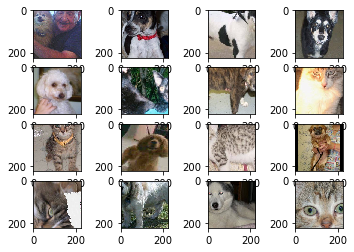

In [3]:
path = r'C:\Users\caeit\Desktop\binru7_1\train'
train_data = DogCat(path,train=True)
train_dataloader = DataLoader(train_data,batch_size=16,shuffle=True)

x,y = next(iter(train_dataloader))

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

for j,i in enumerate(x):
    i = torch.transpose(i,2, 0)
    i = torch.transpose(i,0, 1)
    print(i.shape)
    plt.subplot(4,4,j+1)
    plt.imshow(i*std+mean)

torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])


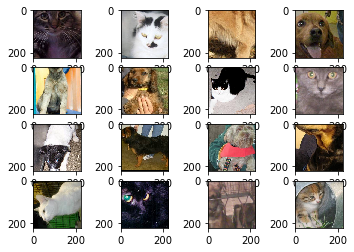

In [4]:
x,y = next(iter(train_dataloader))

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

for j,i in enumerate(x):
    i = torch.transpose(i,2, 0)
    i = torch.transpose(i,0, 1)
    print(i.shape)
    plt.subplot(4,4,j+1)
    plt.imshow(i*std+mean)

torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])


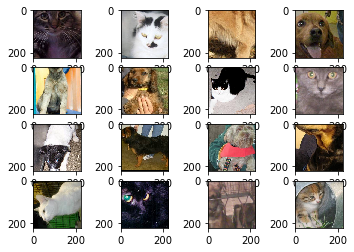

In [5]:
mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

for j,i in enumerate(x):
    i = torch.transpose(i,2, 0)
    i = torch.transpose(i,0, 1)
    print(i.shape)
    plt.subplot(4,4,j+1)
    plt.imshow(i*std+mean)

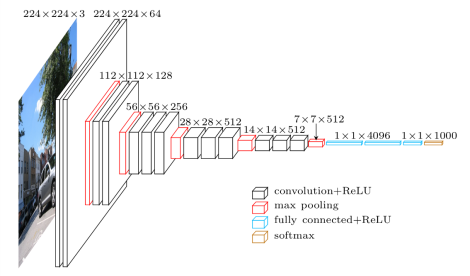

# 直接改VGG16输出层为2，结果不好，需要进行微调

# 微调

In [7]:
from torchsummary import summary
model = vgg16(pretrained=False)
model.classifier[0] = nn.Linear(25088,512,bias=True)
model.classifier[3] = nn.Linear(512,512,bias=True)
model.classifier[4] = nn.Sigmoid()
model.classifier[6] = nn.Linear(in_features=512, out_features=2, bias=True)
model = model.cuda()

* 微调之后模型

In [8]:
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [9]:
cost = torch.nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.classifier.parameters(),lr=1e-4,momentum=0.9)

In [10]:
start = datetime.datetime.now()
for i in range(20):
        correct = 0.0
        total = 25000
        running_loss = 0.0
        accuracy = 0.0
        print('-----epoch', i+1, '-----')
        for num, image in enumerate(train_dataloader):
            x_train, y_train = image
            x_train = x_train.cuda()
            y_train = y_train.cuda()
            optimizer.zero_grad()
            output = model(x_train)
            loss = cost(output, y_train)
            _, predicted = torch.max(output, 1)
            correct += (predicted == y_train).sum().item()
            #print(correct)
            if num%100 == 0:
                print(num*16, '/ 25000', 'loss:', running_loss, ',accuracy:{}%'.format((100*correct/25000)),'correct:%s'%correct)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('-----------Epoch:', i+1, ', one_epoch_loss:', running_loss, '-----------',',accuracy:%f'%(100*correct/25000))
print(datetime.datetime.now()-start)
torch.save(model, '../fine_tuning_20_epoch_dog_cat_vgg16.pkl')

-----epoch 0 -----
0 / 25000 loss: 0.0 ,accuracy:0.024% correct:6.0
1600 / 25000 loss: 67.59210401773453 ,accuracy:3.696% correct:924.0
3200 / 25000 loss: 127.34938856959343 ,accuracy:8.268% correct:2067.0
4800 / 25000 loss: 177.2642368376255 ,accuracy:13.504% correct:3376.0
6400 / 25000 loss: 219.51824894547462 ,accuracy:19.096% correct:4774.0
8000 / 25000 loss: 253.96864581108093 ,accuracy:24.948% correct:6237.0
9600 / 25000 loss: 282.33668391406536 ,accuracy:30.904% correct:7726.0
11200 / 25000 loss: 304.8105586320162 ,accuracy:37.024% correct:9256.0
12800 / 25000 loss: 325.0883940756321 ,accuracy:43.144% correct:10786.0
14400 / 25000 loss: 344.3118287399411 ,accuracy:49.208% correct:12302.0
16000 / 25000 loss: 361.65248657763004 ,accuracy:55.332% correct:13833.0
17600 / 25000 loss: 378.9694661423564 ,accuracy:61.4% correct:15350.0
19200 / 25000 loss: 393.51205299049616 ,accuracy:67.528% correct:16882.0
20800 / 25000 loss: 406.8914713896811 ,accuracy:73.692% correct:18423.0
22400 / 

20800 / 25000 loss: 67.44202161952853 ,accuracy:81.664% correct:20416.0
22400 / 25000 loss: 72.46054657176137 ,accuracy:87.924% correct:21981.0
24000 / 25000 loss: 77.25850953534245 ,accuracy:94.212% correct:23553.0
-----------Epoch: 6 , one_epoch_loss: 81.07620318606496 ----------- ,accuracy:98.040000
-----epoch 7 -----
0 / 25000 loss: 0.0 ,accuracy:0.06% correct:15.0
1600 / 25000 loss: 5.322620881721377 ,accuracy:6.324% correct:1581.0
3200 / 25000 loss: 9.686396526172757 ,accuracy:12.612% correct:3153.0
4800 / 25000 loss: 14.24164549447596 ,accuracy:18.896% correct:4724.0
6400 / 25000 loss: 19.180625528097153 ,accuracy:25.168% correct:6292.0
8000 / 25000 loss: 24.307730123400688 ,accuracy:31.456% correct:7864.0
9600 / 25000 loss: 29.6244098469615 ,accuracy:37.716% correct:9429.0
11200 / 25000 loss: 34.24479262717068 ,accuracy:43.988% correct:10997.0
12800 / 25000 loss: 38.42389772646129 ,accuracy:50.292% correct:12573.0
14400 / 25000 loss: 43.33472214639187 ,accuracy:56.56% correct:1

12800 / 25000 loss: 29.844734175130725 ,accuracy:50.536% correct:12634.0
14400 / 25000 loss: 33.55891642346978 ,accuracy:56.852% correct:14213.0
16000 / 25000 loss: 36.39882619306445 ,accuracy:63.176% correct:15794.0
17600 / 25000 loss: 40.86735400184989 ,accuracy:69.476% correct:17369.0
19200 / 25000 loss: 44.18545702472329 ,accuracy:75.792% correct:18948.0
20800 / 25000 loss: 47.305828001350164 ,accuracy:82.112% correct:20528.0
22400 / 25000 loss: 51.28639071062207 ,accuracy:88.412% correct:22103.0
24000 / 25000 loss: 55.52197958342731 ,accuracy:94.732% correct:23683.0
-----------Epoch: 13 , one_epoch_loss: 57.663195297122 ----------- ,accuracy:98.608000
-----epoch 14 -----
0 / 25000 loss: 0.0 ,accuracy:0.064% correct:16.0
1600 / 25000 loss: 3.1545930057764053 ,accuracy:6.404% correct:1601.0
3200 / 25000 loss: 7.7598056979477406 ,accuracy:12.688% correct:3172.0
4800 / 25000 loss: 11.553147112950683 ,accuracy:19.004% correct:4751.0
6400 / 25000 loss: 14.91028681397438 ,accuracy:25.316

C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type VGG. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + o

# 测试12500张图片，提交到kaggle看结果

In [12]:
model = torch.load(r'C:\Users\caeit\Desktop\fine_tuning_20_epoch_dog_cat_vgg16.pkl')
model = model.cuda()

path = r'C:\Users\caeit\Desktop\binru7_1\test1'
test_data = DogCat(path,train=False,test=True)
test_dataloader = DataLoader(test_data,batch_size=16,shuffle=False,num_workers=0)

result = []
start = datetime.datetime.now()
for num, image in enumerate(test_dataloader):
    x_train, y_train = image
    x_train = x_train.cuda()
    y_train = y_train.cuda()

    output = model(x_train)

    _, predicted = torch.max(output, 1)
    result.append(predicted)
print(datetime.datetime.now()-start)
result1 = []
for i in result:
    i = i.cpu()
    for j in i.data.numpy():
        result1.append(j)
np.savetxt("vgg16.csv", result1, delimiter=',')

0:00:36.979049
